<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/3_3_1_2_ge_data_headmap_DD_MZM_Aa_vs_Ab_2D_fig_3_13_a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

19
[2, 1, 2, 11, 2, 1, 11]


Text(0, 0.5, '$A_b$')

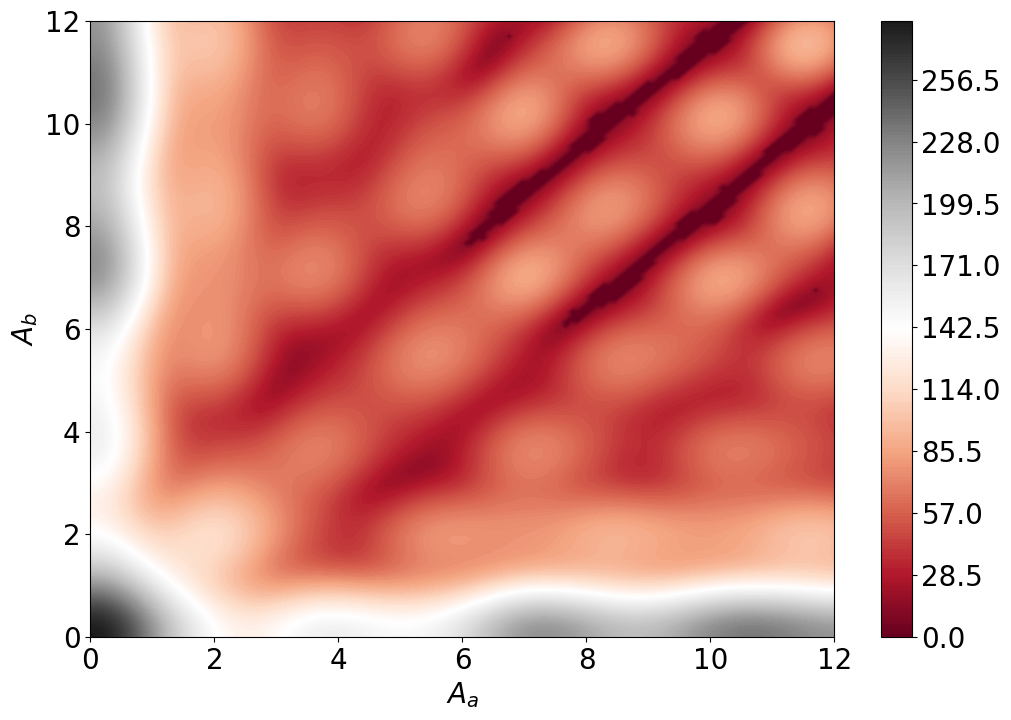

In [ ]:
import math
import numpy as np     # library for vector operation
from mpmath import *   # library for bessel function
import matplotlib.pyplot as plt
#from pylab import *


# Parâmetros dos moduladores
Vpi_pm1  = 3
Vpi_mz1  = 2.4

ts5 = 2*math.sqrt(5)  # 4.47213

# Potências de entrada em dBm nas portas dos moduladores
Ppm1  = 23;  ang1pm = 0;  Upm1   =  0;     Tpm1  =  (pi*Upm1/Vpi_pm1);    Apm1  = (pi/Vpi_pm1)*10**(Ppm1/20)/ts5

# ------------------------------------No condition
#Pmz1a = 33;  ang1a  = 0;  Umz1a  =  0;   Th1a  =  (pi*Umz1a/Vpi_mz1);   Amz1a = (pi/Vpi_mz1)*10**(Pmz1a/20)/ts5
#Pmz1b = 32;  ang1b  = 0;  Umz1b  =  0;     Th1b  =  (pi*Umz1b/Vpi_mz1);   Amz1b = (pi/Vpi_mz1)*10**(Pmz1b/20)/ts5;
# ------------------------------------MZM flat condition
Pmz1a    = 33;  ang1a  = 0;  Umz1a  =  Vpi_mz1/2;   Th1a  =  (pi*Umz1a/Vpi_mz1);   Amz1a = (pi/Vpi_mz1)*10**(Pmz1a/20)/ts5
Nao_used = 10;  ang1b  = 0;  Umz1b  =  0;           Th1b  =  (pi*Umz1b/Vpi_mz1);   Amz1b = Amz1a - pi/2;
#-------------------------------------

up_n  =  55
up_m  =  67
noise = 10**-10; noise_dBm = 10*log10(noise)

#===============================================================================
#ang1a_n = np.arange(0,pi,0.1)
#f_x     = np.sin(ang1a_n)

#print(ang1a_n)
top_m = int((up_m-1)/2)
ind_m = range(-top_m,top_m+1)

# ===========================================================================

def reduct_vector(up_act, vec_comb, up_new):
 # up_act = tamanho atual do vector vec_comb
 a = int((up_act-up_new)/2)
 b = int(a + up_new)
 c = int((up_new-1)/2)
 ax_rang = range(-c,c+1)
 ax_new = list(ax_rang)
 new_vcomb = []
 for k in range(a,b):
  new_vcomb.append(vec_comb[k])

 return new_vcomb
# ===========================================================================

b = [1,2,1,1,1,1,2,1,2,11,2,1,11,1,2,2,3,3,0]
print(len(b))

b1 = reduct_vector(19,b,7)
print(b1)

up_act      = up_m
length_flat = 9     # quantidade de linhas comparadas
length_matrix = 120 # tamanho maixmo da voltagem multiplicado x 10 em V
limit_axis_xy = length_matrix/10

#mx_st = [[0 for k in range(length_matrix)] for j in range(length_matrix)]
mx_st = np.zeros((length_matrix, length_matrix))

for var_Amz1a in range(length_matrix):
 for var_Amz1b in range(length_matrix):
   # var_Amz1b = var_Amz1a - pi/2;
    Vector_mz = []
    flat_cond = []
    temp2     = []
    pente_osa = []

    for m in ind_m:
      J_m_Amz1a = besselj(m,var_Amz1a/10)
      J_m_Amz1b = besselj(m,var_Amz1b/10)
      temp = J_m_Amz1a*exp(j*(m*ang1a + Th1a)) + J_m_Amz1b*exp(j*(m*ang1b + Th1b))
      Vector_mz.append(temp)

    temp2 = [abs(k2) for k2 in Vector_mz]
    pente_osa = np.square(temp2)
    flat_cond = reduct_vector(up_act, pente_osa, length_flat)
    st_dev = 100*np.std(flat_cond)/np.mean(flat_cond)
    #limite de planicidade ---------
    men_dB = 10*log10(min(flat_cond))
    mai_dB = 10*log10(max(flat_cond))
    dif_dB = mai_dB - men_dB
    if dif_dB < 2:
      st_dev = 0.9
    #--------------------------------
    mx_st[var_Amz1a,var_Amz1b]= st_dev

#x  = list(range(length_matrix))
#y  = list(range(length_matrix))

ax_1 = np.linspace(0,limit_axis_xy,length_matrix)
ay_1 = np.linspace(0,limit_axis_xy,length_matrix)

plt.rcParams['font.size']=20
plt.figure(figsize=(7,5))
plt.contourf(ax_1, ay_1, mx_st, 200, cmap='RdGy')
plt.colorbar();
plt.xlabel("$A_a$", fontsize=20)
plt.ylabel("$A_b$", fontsize=20)

#ax_mz = list(range(up_m))

In [ ]:
print("length_matrix",length_matrix)
print("limit_axis_xy",limit_axis_xy)
print(type(limit_axis_xy))
print(len(range(length_matrix)))

length_matrix 120
limit_axis_xy 12.0
<class 'float'>
120
